# Nanocompore SampComp API demo 

`SampComp` first parses the sample eventalign collapse files pileup the observed results reference per reference at position level. Then, positions are compared using various statistical methods and the statistics are stored in a (shelve DBM) containing the results for all positions with sufficient coverage. The API returns a `SampCompDB` database wrapper object that can be subsequently interogated to extract data.

## Import the package

In [1]:
from nanocompore.SampComp import SampComp
from nanocompore.common import jhelp

## SampComp API documentation

In [3]:
jhelp(SampComp)

---

**nanocompore.SampComp.\__init__**

Initialise a `SampComp` object and generates a white list of references with sufficient coverage for subsequent analysis. The retuned object can then be called to start the analysis.

---

* **eventalign_fn_dict** *: dict or str (required)*

Multilevel dictionnary indicating the condition_label, sample_label and file name of the eventalign_collapse output. 2 conditions are expected and at least 2 sample replicates per condition are highly recommended. One can also pass YAML file describing the samples instead. Example `d = {"S1": {"R1":"path1.tsv", "R2":"path2.tsv"}, "S2": {"R1":"path3.tsv", "R2":"path4.tsv"}}`

* **outpath** *: directory_path (default = results)*

Path to the output folder.

* **outprefix** *: str (default = out_)*

text outprefix for all the files generated by the function.

* **overwrite** *: bool (default = False)*

If the output directory already exists, the standard behaviour is to raise an error to prevent overwriting existing data This option ignore the error and overwrite data if they have the same outpath and outprefix.

* **fasta_fn** *: file_path (required)*

Path to a fasta file corresponding to the reference used for read alignment.

* **bed_fn** *: file_path (default = None)*

Path to a BED file containing the annotation of the transcriptome used as reference when mapping.

* **whitelist** *: nancocompore.Whitelist object (default = None)*

Whitelist object previously generated with nanocompore Whitelist. If not given, will be automatically generated.

* **comparison_methods** *: list of str from {MW,KS,TT,GMM} (default = ['GMM', 'KS'])*

Statistical method to compare the 2 samples (mann_whitney or MW, kolmogorov_smirnov or KS, t_test or TT, gaussian_mixture_model or GMM). This can be a list or a comma separated string.

* **logit** *: bool (default = False)*

Force logistic regression even if we have less than 2 replicates in any condition.

* **allow_warnings** *: bool (default = False)*

If True runtime warnings during the ANOVA tests don't raise an error.

* **sequence_context** *: int (default = 0)*

Extend statistical analysis to contigous adjacent base if available.

* **sequence_context_weights** *: str {uniform,harmonic} (default = uniform)*

type of weights to used for combining p-values.

* **min_coverage** *: int (default = 30)*

minimal read coverage required in all sample.

* **downsample_high_coverage** *: int (default = 0)*

For reference with higher coverage, downsample by randomly selecting reads.

* **max_invalid_kmers_freq** *: float (default = 0.1)*

maximum frequency of NNNNN, mismatching and missing kmers in reads.

* **select_ref_id** *: list or str (default = [])*

if given, only reference ids in the list will be selected for the analysis.

* **exclude_ref_id** *: list or str (default = [])*

if given, refid in the list will be excluded from the analysis.

* **nthreads** *: int <= 3 (default = 3)*

Number of threads (two are used for reading and writing, all the others for parallel processing).

* **log_level** *: str {warning,info,debug} (default = info)*

Set the log level.



## Basic usage of SampComp

### Using a Python dictionary to specify the location of the eventalign files

In [2]:
# Init the object
s = SampComp (
    eventalign_fn_dict = {
        "S1":{"R1":'./sample_files/modified_rep_1.tsv', "R2":"./sample_files/modified_rep_2.tsv"},
        "S2":{"R1":'./sample_files/unmodified_rep_1.tsv', "R2":"./sample_files/unmodified_rep_2.tsv"}},
    outpath= "./results",
    fasta_fn = "./reference/ref.fa",
    overwrite=True,
    nthreads=6)

db = s()

Initialising SampComp and checking options
Initialising Whitelist and checking options
Reading eventalign index files
	References found in index: 5
Filtering out references with low coverage
	References remaining after reference coverage filtering: 5
Starting data processing
100%|██████████| 5/5 [00:07<00:00,  2.00s/ Processed References]
Loading SampCompDB
Calculate results


#### Using a YAML file instead to specify the files location

In [4]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    output_db_fn = "./results/out.db",
    fasta_fn = "./reference/ref.fa",
    log_level="debug")

# Run the analysis
db = s ()

Initialise SampComp and checks options
Found duplicated labels in the replicate names. Prefixing with condition name
Initialise Whitelist and checks options
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Invalid kmer information not available in index file
Read eventalign index files
	Condition:Modified Sample:Modified_rep1 	valid reads: 275
	Condition:Modified Sample:Modified_rep2 	valid reads: 225
	Condition:Unmodified Sample:Unmodified_rep1 	valid reads: 275
	Condition:Unmodified Sample:Unmodified_rep2 	valid reads: 225
	References found in index: 5
Filter out references with low coverage
	Modified Modified_rep1 Reads: 275	Unmodified Unmodified_rep1 Reads: 275	Modified Modified_rep2 Reads: 225	Unmodified Unmodified_rep2 Reads: 225	valid_ref_id: 5
	References remaining after reference coverage filtering: 5
Start data processing
Adding ref_0000 to in_q
Adding ref_0001 to in_

(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5228e477f0>)

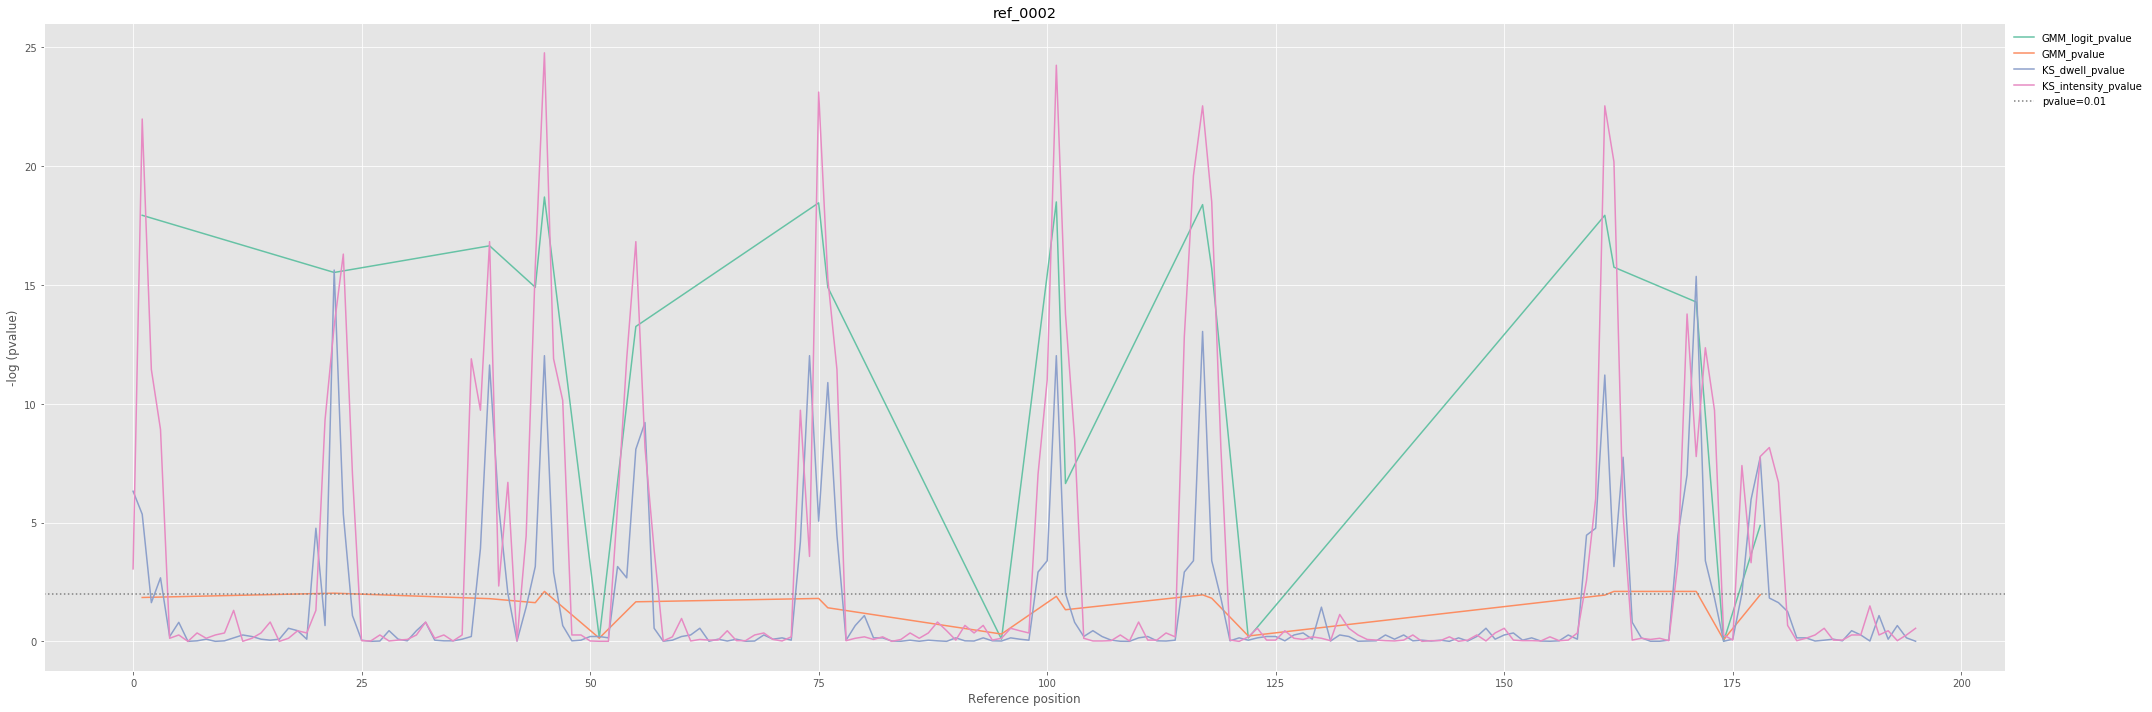

In [5]:
db.plot_pvalue("ref_0002")

## More advanced usage examples

#### Tweaking statistical options

In [9]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    output_db_fn = "./results/out.db",
    fasta_fn = "./reference/ref.fa",
    comparison_method=["GMM", "MW", "KS", "TT"])
#     sequence_context=2,
#     sequence_context_weights='harmonic')

# Run the analysis
db = s ()

Initialise SampComp and checks options
Initialise Whitelist and checks options
Read eventalign index files
	References found in index: 5
Filter out references with low coverage
	References remaining after reference coverage filtering: 5
Start data processing
100%|██████████| 5/5 [00:22<00:00,  5.12s/ Processed References]


(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd12abf69e8>)

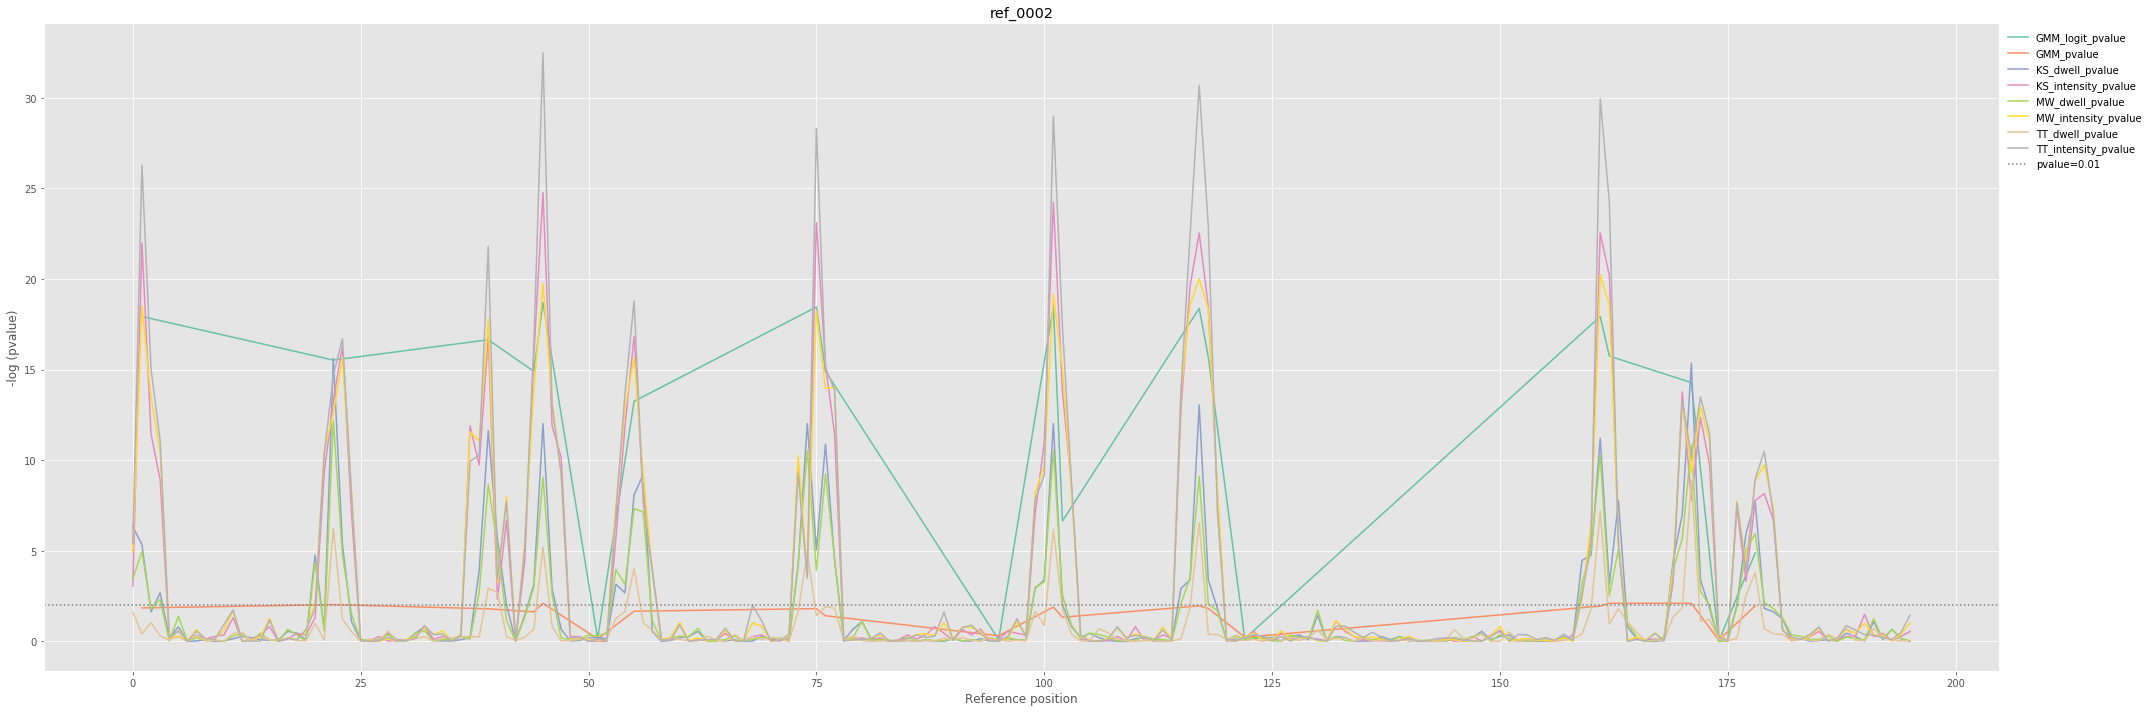

In [10]:
db.plot_pvalue("ref_0002")

(<Figure size 2160x720 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fd12ae901d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd128472668>))

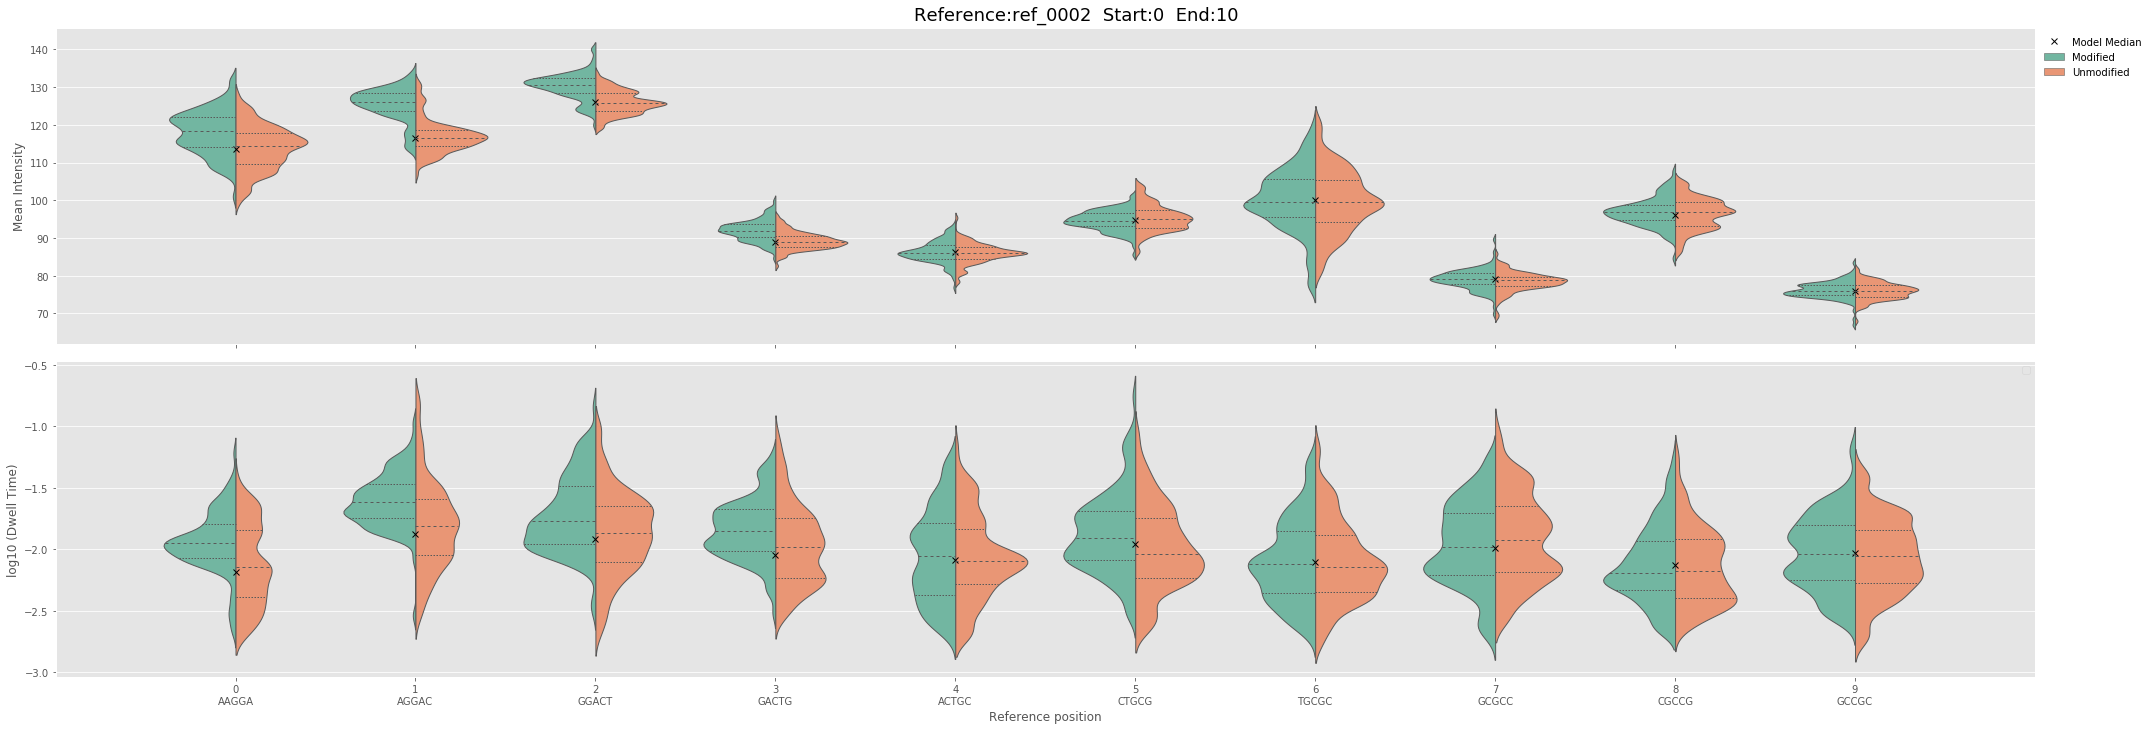

In [11]:
db.plot_signal("ref_0002", 0, 10)

#### Tweaking statistical options

In [12]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath = "./results",
    fasta_fn = "./reference/ref.fa",
    comparison_method=["GMM", "MW", "KS"],
    sequence_context=2,
    sequence_context_weights='harmonic',
    overwrite=True)

# Run the analysis
db = s ()

Initialise SampComp and checks options
Initialise Whitelist and checks options
Read eventalign index files
	References found in index: 5
Filter out references with low coverage
	References remaining after reference coverage filtering: 5
Start data processing
100%|██████████| 5/5 [00:13<00:00,  2.64s/ Processed References]
Loading SampCompDB
Calculate results


ZeroDivisionError: float division by zero

## Full API documentation